In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(lubridate)
library(hms)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
player_data <- read_csv("https://raw.githubusercontent.com/jaslynemarek/DSCI-Project-Individual/refs/heads/main/players.csv")


session_data <- read_csv("https://raw.githubusercontent.com/jaslynemarek/DSCI-Project-Individual/refs/heads/main/sessions.csv")


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# 1) Data Description:

## players.csv

Number of observations: 196 - each one represents one player (196 players in total)

Number of variables: 7 

- experience (character) - how experienced is the player   
     - Beginner 
     - Amateur 
     - Regular 
     - Pro 
     - Veteran 
- subscribe (logical) - newsletter subscription (true or false)  
- hashedEmail (character) - player's email
- played_hours (double) - total amount of hours played
- name (character) - individual's name
- gender (character) - individual's gender
     - Male
     - Female
     - Non-binary
     - Agender
     - Two-Spirited
     - Other
     - Prefer not to say
- Age (double) - individual's age



## sessions.csv

Number of observations: 1535 - each observation represents one playing session

Number of variables: 5
<ul>
    <li>hashedEmail (character) - individuals's email</li>
    <li>start_time (character) - session start time</li>
    <li>end_time (character) - session end time</li>
    <li>original_start_time (doube) - original start time (UNIX time)</li>
    <li>original_end_time (double) - original end time (UNIX time)</li>
</ul>



# Potential Issues with Data:
- Some data types could be switched to be more representative of what they represent.
    - Experience and gender, switch from character to factor
    - Age, switch from double to integer
    - Start/end times listed as characters, switch to dttm 

# Age Summary Statistics
|Min|Max|Mean|Median|
|:---:|:---:|:----:|:----:|
|8|50|20.52062|19|

# Hours Played Summary Statistics
|Min|Max|Mean|Median|
|:---:|:---:|:---:|:----:|
|0|223.1|5.845918|0.1|

In [3]:
age_summary <- summarize(player_data, mean_age = mean(Age, na.rm = TRUE),
                     min_age = min(Age, na.rm = TRUE),
                     max_age = max(Age, na.rm = TRUE),
                    median_age = median(Age, na.rm = TRUE))
age_summary
hours_summary <- summarize(player_data, mean_hours_played = mean(played_hours, na.rm = TRUE),
                            min_hours_played = min(played_hours, na.rm = TRUE),
                            max_hours_played = max(played_hours, na.rm = TRUE),
                            median_hours_played = median(played_hours, na.rm = TRUE))
hours_summary

mean_age,min_age,max_age,median_age
<dbl>,<dbl>,<dbl>,<dbl>
20.52062,8,50,19


mean_hours_played,min_hours_played,max_hours_played,median_hours_played
<dbl>,<dbl>,<dbl>,<dbl>
5.845918,0,223.1,0.1


# 2) Questions:

## Broad Question:
**Question 3:** demand forecasting, what time windows are most likely to have large number of simultaneous players?

## Specific Question:
Can the start time predict the playing session length in sessions.csv?

**How will the data help address the specific question?**
- sessions.csv has start and end time variables, session time can be calculated 
  -  mutate() function can be used to add another column that is the end time minus the start time (session length). 
- Plot start time and session length, regression can be used for the model to further assess the question

# 3) Exploratory Data Analysis and Visualization


# Loading Data Sets Into R

In [4]:
player_data <- read_csv("https://raw.githubusercontent.com/jaslynemarek/DSCI-Project-Individual/refs/heads/main/players.csv")
player_data

session_data <- read_csv("https://raw.githubusercontent.com/jaslynemarek/DSCI-Project-Individual/refs/heads/main/sessions.csv")
session_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


# Data Wrangling

In [5]:
session_data_clean <- session_data |>
                    mutate(start_time = dmy_hm(start_time),
                    end_time = dmy_hm(end_time))
session_data_clean

player_data_clean <- player_data |>
                    mutate(Age = as.integer(Age),
                           gender = as.factor(gender),
                          experience = as.factor(experience))
player_data_clean

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<dttm>,<dttm>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,2024-07-25 03:58:00,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 16:01:00,2024-05-25 16:12:00,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 15:08:00,2024-06-23 17:10:00,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-04-15 07:12:00,2024-04-15 07:21:00,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,2024-09-21 02:13:00,2024-09-21 02:30:00,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,2024-06-21 02:31:00,2024-06-21 02:49:00,1.71894e+12,1.71894e+12


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


# Mean Values for players.csv Dataset

In [6]:
mean_values <- player_data_clean |>
                    summarize(mean_played_hours = mean(played_hours, na.rm = TRUE),
                                mean_age = mean(Age, na.rm = TRUE))
mean_values

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,20.52062


|Mean Hours Played Per Person|Mean Age|
|:---------------------------:|:------:|
|5.845918|20.52062|

# Visualizations

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


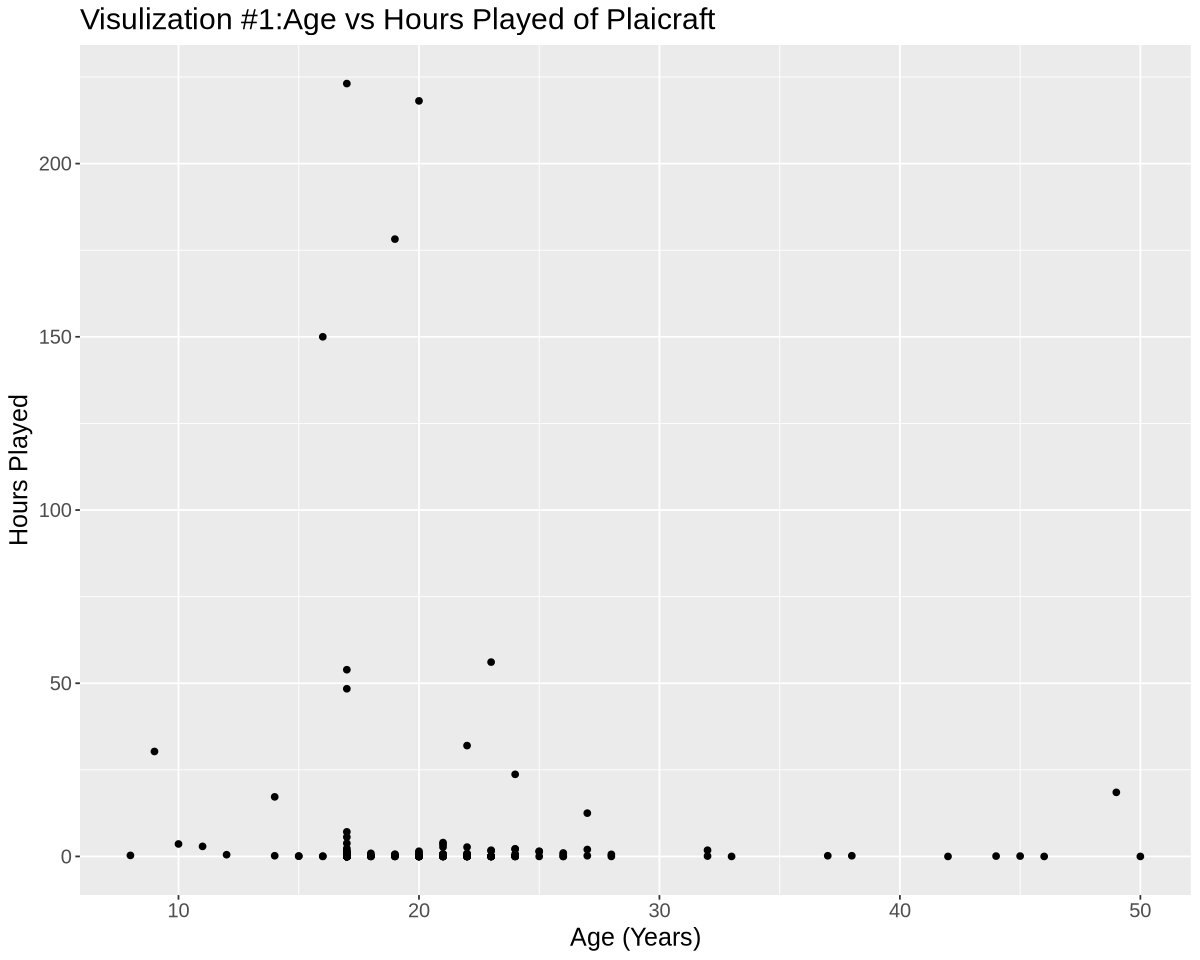

In [11]:
age_vs_hours_plot <- ggplot(player_data_clean, aes(x = Age, y = played_hours))+
                    geom_point()+
                    xlab("Age (Years)")+
                    ylab("Hours Played")+
                    ggtitle("Visulization #1:Age vs Hours Played of Plaicraft")+
                    theme(text = element_text(size = 15))

age_vs_hours_plot

### Visualization #1 Insights
- Majority of individuals played <25 hours total, some playing over 50 hours, who were in between the ages of 15 and 25.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


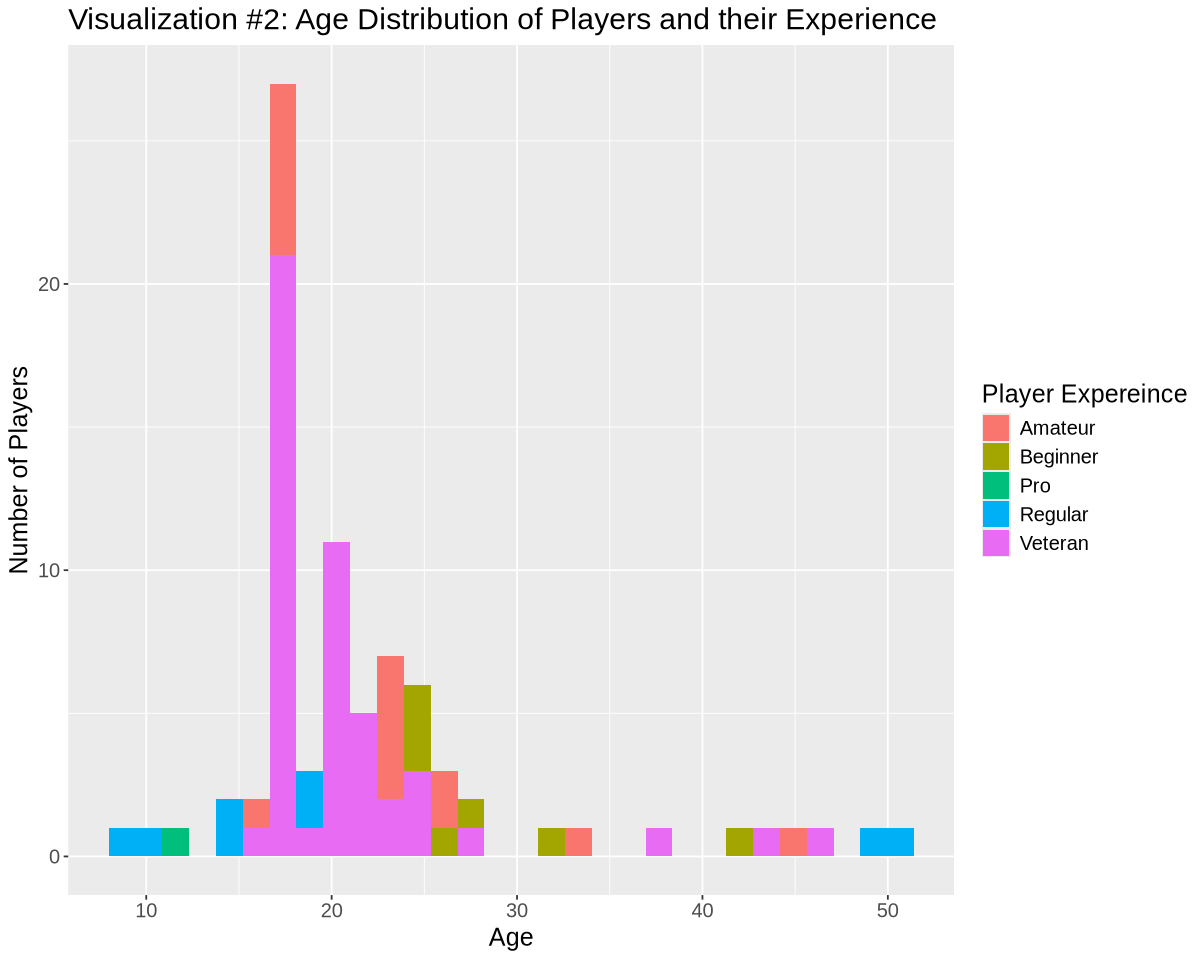

In [10]:
options(repr.plot.width = 10, repr.plot.height = 8)
age_histogram_plot <- ggplot(player_data_clean, aes(x = Age, fill = as_factor(experience)))+
                        geom_histogram(position = "identity")+
                        labs(x = "Age", y = "Number of Players", fill = "Player Expereince")+
                        ggtitle("Visualization #2: Age Distribution of Players and their Experience")+
                        theme(text = element_text(size = 15))
age_histogram_plot
                        

### Visualization #2 Insights
- Many players in late teens/early twenties are veterans, beginners are between the ages of about 24-43, while individuals at the highest and lowest ages (8 and 50) have regular experience


Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


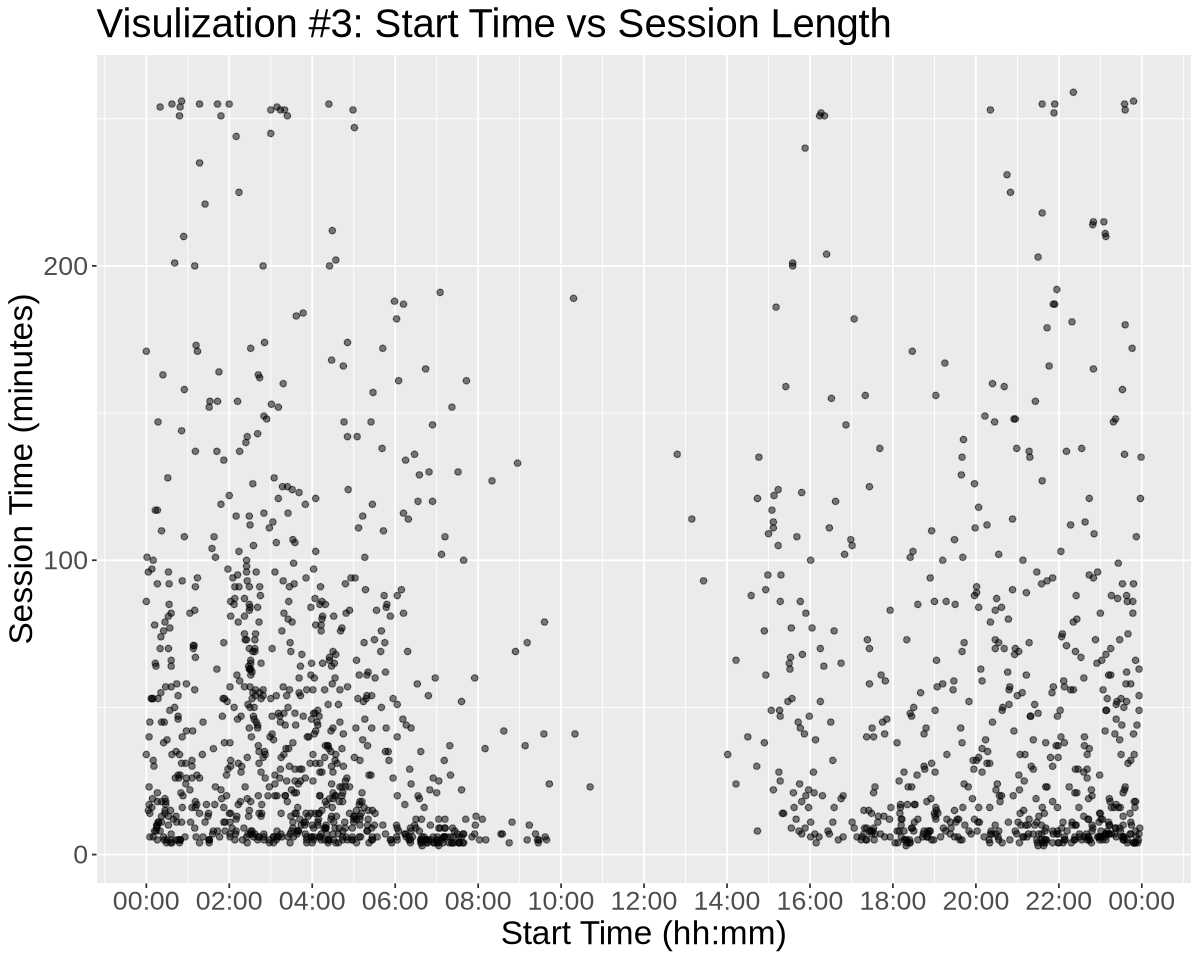

In [9]:
session_data_mutated <- mutate(session_data_clean, session_time = end_time - start_time,
                              start_time_hms = as_hms(start_time))

time_plot <- ggplot(session_data_mutated, aes(x = start_time_hms, y = session_time))+
            geom_point(alpha = 0.5)+
            xlab("Start Time (hh:mm)")+
            ylab("Session Time (minutes)")+
            ggtitle("Visulization #3: Start Time vs Session Length")+
            theme(text = element_text(size = 20))+
            scale_x_time(breaks = seq(0,24*3600, by = 2*3600), labels = scales::time_format("%H:%M"))
time_plot

### Visualization #3 Insights
- Very few players are starting their sessions between 08:00 and 14:00, server is busy otherwise

# 4) Methods and Plan

# Method to Address Question:

**Method**: Use KNN regression to build a model that predicts the session time in minutes when given the start time (in hour:minute).

- Predicts a **quantitative variable**: the session time (in minutes), k-nn regression will find the k-nearest neighbours in terms of predictors and average the values, using them to predict the session time.
- Using the KNN-regression model **assumes** that points close to each other will be more related
- **Drawbacks** to KNN regression:
    - Can be slow with large datasets
    - Decreasing reliability beyond dataset values
    - Trends can be difficult to interpret
    - Choosing the wrong "k" value can lead to underfitting or overfitting
  
- To **compare/select** the model, different "k" values are tested for accuracy by tuning/splitting the data into training and testing sets,"k" value with highest accuracy (lowest RMSPE) will be chosen
- A **five fold cross-validation** will be used to estimate the performance of the model 
    - The data is split into two parts: the **training set** and **testing set**, about 75% training set and 25% testing set, model is built using the training set and applied to the testing set
        - Training data is split again, into **training data** and **validation data** sets
        - **Training data** will be used to train each "k" value, evaluating accuracy using the **validation set** described in the 5 fold cross validation mentioned above
 
- After model is built, it can then be applied to the testing data
    - Precision, accuracy and recall can be computed, evaluating effectiveness of the model.
    - This data can be used as evidence to support the answer to the question being evaluated